In [1]:
import torch
import matplotlib
import pandas as pd
import string
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("./dataset/sign_mnist_train.csv")

In [3]:
raw_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [9]:
label_count = raw_data['label'].value_counts()
label_count

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

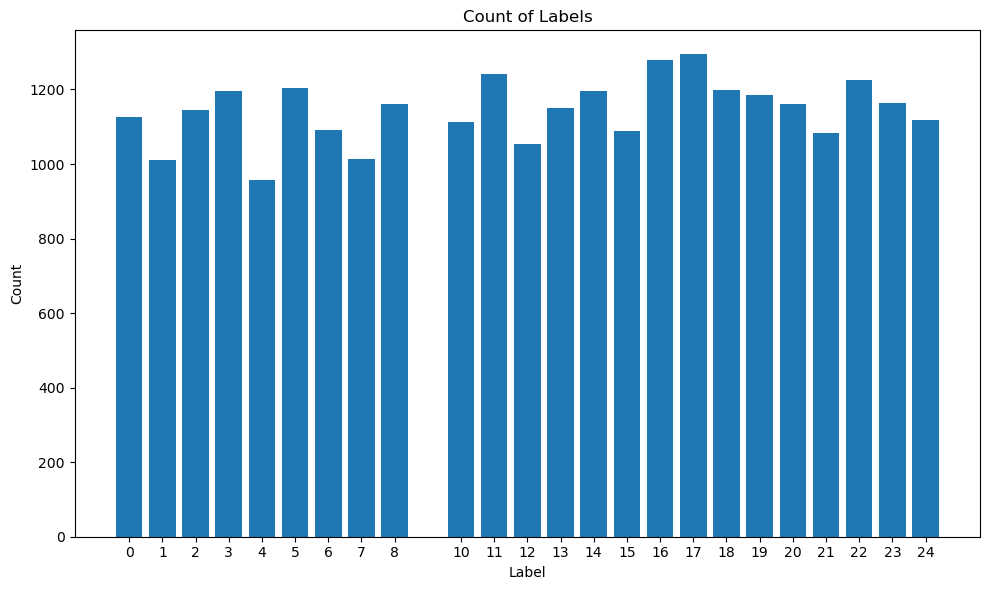

In [12]:
labels = label_count.index
counts = label_count.values

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.xticks(labels)
plt.ylabel('Count')
plt.title('Count of Labels')
plt.tight_layout()
plt.show()


In [43]:
img = raw_data.drop(labels=['label'],axis=1)
img = img.values.reshape(-1,28,28)
label_value = raw_data['label'].values

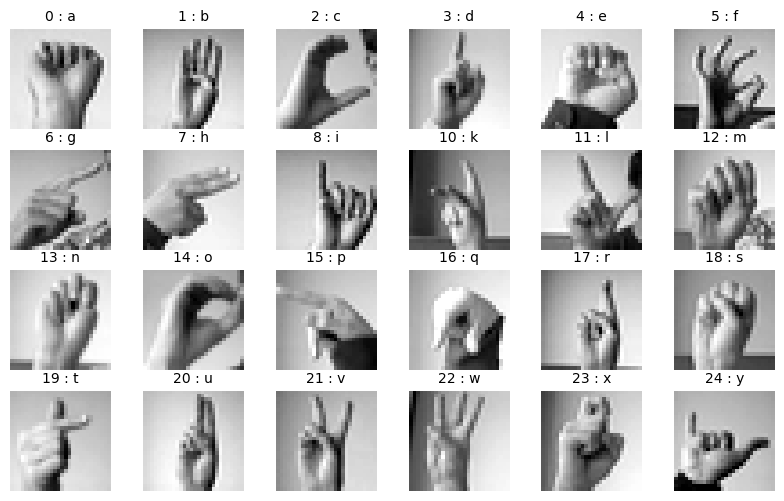

In [64]:
alphabet = string.ascii_lowercase
num_images=24
num_cols = 6

img_list = []
label_list = []

for i in range(26):
    for j in range(200):
        if label_value[j] == i:
            img_list.append(img[j])
            label_list.append(i)
            break

num_rows = (num_images + num_cols - 1) // num_cols
plt.figure(figsize=(10, 6))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img_list[i], cmap='gray')
    plt.axis('off')
    plt.title(f'{label_list[i]} : {alphabet[label_list[i]]}', fontsize=10)
plt.show()